In [61]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from pandas import ExcelWriter
from pandas import ExcelFile
import glob
%matplotlib inline

from scipy import signal
from scipy.fft import fftshift
from matplotlib import mlab

import os
import pylab
import librosa
import librosa.display

In [62]:
Tesla_Dos30 = pd.read_csv("Tesla_Dos30.csv")
Tesla_Dos5000 = pd.read_csv("Tesla_Dos5000.csv")
Tesla_Dos10000 = pd.read_csv("Tesla_Dos10000.csv")

Tesla_fuzzing500 = pd.read_csv("Tesla_fuzzing500.csv")
Tesla_fuzzing1000 = pd.read_csv("Tesla_fuzzing1000.csv")

Tesla_Normal1 = pd.read_csv("Tesla_Normal1.csv")
Tesla_Normal2 = pd.read_csv("Tesla_Normal2.csv")

Tesla_Replay1 = pd.read_csv("Tesla_Replay1.csv")
Tesla_Replay2 = pd.read_csv("Tesla_Replay2.csv")

In [63]:
Tesla_Dos30_10 = Tesla_Dos30[Tesla_Dos30['Result'] > 44]
Tesla_Dos5000_10 = Tesla_Dos5000[Tesla_Dos5000['Result'] > 44]
Tesla_Dos10000_10 = Tesla_Dos10000[Tesla_Dos10000['Result'] > 44]

Tesla_fuzzing500_10 = Tesla_fuzzing500[Tesla_fuzzing500['Result'] > 44]
Tesla_fuzzing1000_10 = Tesla_fuzzing1000[Tesla_fuzzing1000['Result'] > 44]

Tesla_Replay1_10 = Tesla_Replay1[Tesla_Replay1['Result'] > 44]
Tesla_Replay2_10 = Tesla_Replay2[Tesla_Replay2['Result'] > 44]

In [64]:
Kia_DoS5000 = pd.read_csv("Kia_DoS5000.csv")
Kia_DoS10000 = pd.read_csv("Kia_DoS10000.csv")
Kia_DoS_rand = pd.read_csv("Kia_DoS_rand.csv")

Kia_Fuzzing100 = pd.read_csv("Kia_Fuzzing100.csv")
Kia_Fuzzing500 = pd.read_csv("Kia_Fuzzing500.csv")
Kia_Fuzzing_rand = pd.read_csv("Kia_Fuzzing_rand.csv")

Kia_Normal2 = pd.read_csv("Kia_Normal2.csv")
Kia_Normal3 = pd.read_csv("Kia_Normal3.csv")
Kia_Normal4 = pd.read_csv("Kia_Normal4.csv")

Kia_Replay1 = pd.read_csv("Kia_Replay1.csv")
Kia_Replay2 = pd.read_csv("Kia_Replay2.csv")

In [65]:
Kia_DoS5000_10 = Kia_DoS5000[Kia_DoS5000['Result'] > 44]
Kia_DoS10000_10 = Kia_DoS10000[Kia_DoS10000['Result'] > 44]
Kia_DoS_rand_10 = Kia_DoS_rand[Kia_DoS_rand['Result'] > 44]

Kia_Fuzzing100_10 = Kia_Fuzzing100[Kia_Fuzzing100['Result'] > 44]
Kia_Fuzzing500_10 = Kia_Fuzzing500[Kia_Fuzzing500['Result'] > 44]
Kia_Fuzzing_rand_10 = Kia_Fuzzing_rand[Kia_Fuzzing_rand['Result'] > 44]

Kia_Replay1_10 = Kia_Replay1[Kia_Replay1['Result'] > 44]
Kia_Replay2_10 = Kia_Replay2[Kia_Replay2['Result'] > 44]

In [66]:
BMW_2E5_DoS = pd.read_csv("BMW_2E5_DoS.csv")
BMW_DoS5000 = pd.read_csv("BMW_DoS5000.csv")
BMW_DoS10000 = pd.read_csv("BMW_DoS10000.csv")
BMW_DoS_rand = pd.read_csv("BMW_DoS_rand.csv")

BMW_Fuzz100 = pd.read_csv("BMW_Fuzz100.csv")
BMW_Fuzz500 = pd.read_csv("BMW_Fuzz500.csv")
BMW_Fuzzing_rand = pd.read_csv("BMW_Fuzzing_rand.csv")

BMW_Normal_1K2 = pd.read_csv("BMW_Normal_1K2.csv")
BMW_Normal_2K2 = pd.read_csv("BMW_Normal_2K2.csv")

BMW_Replay1 = pd.read_csv("BMW_Replay1.csv")
BMW_Replay2 = pd.read_csv("BMW_Replay2.csv")

In [67]:
BMW_2E5_DoS_10 = BMW_2E5_DoS[BMW_2E5_DoS['Result'] >= 25]
BMW_DoS5000_10 = BMW_DoS5000[BMW_DoS5000['Result'] >= 25]
BMW_DoS10000_10 = BMW_DoS10000[BMW_DoS10000['Result'] >= 25]
BMW_DoS_rand_10 = BMW_DoS_rand[BMW_DoS_rand['Result'] >= 25]

BMW_Fuzz100_10 = BMW_Fuzz100[BMW_Fuzz100['Result'] >= 25]
BMW_Fuzz500_10 = BMW_Fuzz500[BMW_Fuzz500['Result'] >= 25]
BMW_Fuzzing_rand_10 = BMW_Fuzzing_rand[BMW_Fuzzing_rand['Result'] >= 25]

BMW_Replay1_10 = BMW_Replay1[BMW_Replay1['Result'] >= 25]
BMW_Replay2_10 = BMW_Replay2[BMW_Replay2['Result'] >= 25]

In [68]:
BMW_2E5_DoS_10 = BMW_2E5_DoS[BMW_2E5_DoS['Result'] >= 25]
BMW_DoS5000_10 = BMW_DoS5000[BMW_DoS5000['Result'] >= 25]
BMW_DoS10000_10 = BMW_DoS10000[BMW_DoS10000['Result'] >= 25]
BMW_DoS_rand_10 = BMW_DoS_rand[BMW_DoS_rand['Result'] >= 25]

Kia_DoS5000_10 = Kia_DoS5000[Kia_DoS5000['Result'] > 44]
Kia_DoS10000_10 = Kia_DoS10000[Kia_DoS10000['Result'] > 44]
Kia_DoS_rand_10 = Kia_DoS_rand[Kia_DoS_rand['Result'] > 44]

Tesla_Dos30_10 = Tesla_Dos30[Tesla_Dos30['Result'] > 44]
Tesla_Dos5000_10 = Tesla_Dos5000[Tesla_Dos5000['Result'] > 44]
Tesla_Dos10000_10 = Tesla_Dos10000[Tesla_Dos10000['Result'] > 44]

In [69]:
DoS = pd.concat([pd.DataFrame(BMW_2E5_DoS_10), pd.DataFrame(BMW_DoS5000_10),
           pd.DataFrame(BMW_DoS10000_10), pd.DataFrame(BMW_DoS_rand_10),
           pd.DataFrame(Kia_DoS5000_10), pd.DataFrame(Kia_DoS10000_10),
           pd.DataFrame(Kia_DoS_rand_10),
           pd.DataFrame(Tesla_Dos30_10), pd.DataFrame(Tesla_Dos5000_10),
           pd.DataFrame(Tesla_Dos10000_10), ], 
           ignore_index=True)
print(len(DoS))

6696


In [70]:
BMW_Fuzz100_10 = BMW_Fuzz100[BMW_Fuzz100['Result'] >= 25]
BMW_Fuzz500_10 = BMW_Fuzz500[BMW_Fuzz500['Result'] >= 25]
BMW_Fuzzing_rand_10 = BMW_Fuzzing_rand[BMW_Fuzzing_rand['Result'] >= 25]

Kia_Fuzzing100_10 = Kia_Fuzzing100[Kia_Fuzzing100['Result'] > 44]
Kia_Fuzzing500_10 = Kia_Fuzzing500[Kia_Fuzzing500['Result'] > 44]
Kia_Fuzzing_rand_10 = Kia_Fuzzing_rand[Kia_Fuzzing_rand['Result'] > 44]

Tesla_fuzzing500_10 = Tesla_fuzzing500[Tesla_fuzzing500['Result'] > 44]
Tesla_fuzzing1000_10 = Tesla_fuzzing1000[Tesla_fuzzing1000['Result'] > 44]

In [71]:
Fuzz = pd.concat([pd.DataFrame(BMW_Fuzz100_10), pd.DataFrame(BMW_Fuzz500_10),
           pd.DataFrame(BMW_Fuzzing_rand_10), 
           pd.DataFrame(Kia_Fuzzing100_10), pd.DataFrame(Kia_Fuzzing500_10),
           pd.DataFrame(Kia_Fuzzing_rand_10),
           pd.DataFrame(Tesla_fuzzing500_10), pd.DataFrame(Tesla_fuzzing1000_10),], 
           ignore_index=True)
print(len(Fuzz))

10701


In [72]:
BMW_Replay1_10 = BMW_Replay1[BMW_Replay1['Result'] >= 25]
BMW_Replay2_10 = BMW_Replay2[BMW_Replay2['Result'] >= 25]

Kia_Replay1_10 = Kia_Replay1[Kia_Replay1['Result'] > 44]
Kia_Replay2_10 = Kia_Replay2[Kia_Replay2['Result'] > 44]

Tesla_Replay1_10 = Tesla_Replay1[Tesla_Replay1['Result'] > 44]
Tesla_Replay2_10 = Tesla_Replay2[Tesla_Replay2['Result'] > 44]

In [106]:
Replay_BMW = pd.concat([pd.DataFrame(BMW_Replay1_10), pd.DataFrame(BMW_Replay2_10)],          
         ignore_index=True)
print(len(Replay_BMW))

Replay_Kia = pd.concat([pd.DataFrame(Kia_Replay1_10), pd.DataFrame(Kia_Replay2_10)],          
         ignore_index=True)
print(len(Replay_Kia))

Replay_Tesla = pd.concat([pd.DataFrame(Tesla_Replay1_10), pd.DataFrame(Tesla_Replay2_10)],          
         ignore_index=True)
print(len(Replay_Tesla))

310
205
631


In [124]:
freq0, time0, amp0 = signal.spectrogram(np.array(Replay_BMW['Result']), fs=0.001, nfft=257*300)
freq1, time1, amp1 = signal.spectrogram(np.array(Replay_BMW['Avg_time_gap']), fs=0.001, nfft=257*300)
print('Amp Data: ',amp0.shape)
print('Amp Time: ',amp1.shape)

Final_Normal_Spec = pd.concat([pd.DataFrame(amp0), pd.DataFrame(pd.DataFrame(amp1))], 
                              ignore_index=True, axis=1)
listofzeros = [0] * len(Final_Normal_Spec)
Final_Normal_Spec_Tesla = pd.concat([pd.DataFrame(Final_Normal_Spec), pd.DataFrame(pd.DataFrame(listofzeros))], 
                              ignore_index=True, axis=1)
print('Length: ', len(Final_Normal_Spec_Tesla))
Final_Normal_Spec_Tesla

Amp Data:  (38551, 1)
Amp Time:  (38551, 1)
Length:  38551


,0,1,2
0,2233.977494,0.189235,0
1,4472.823084,0.384752,0
2,4487.426835,0.403594,0
3,4511.764614,0.434994,0
4,4545.833718,0.478944,0
...,...,...,...
38546,22269.685429,17.379940,0
38547,22273.161203,17.382885,0
38548,22275.644231,17.384989,0
38549,22277.134181,17.386251,0


Text(0.5, 1.0, 'BMW Data Generation Entropy In 0.1 Second')

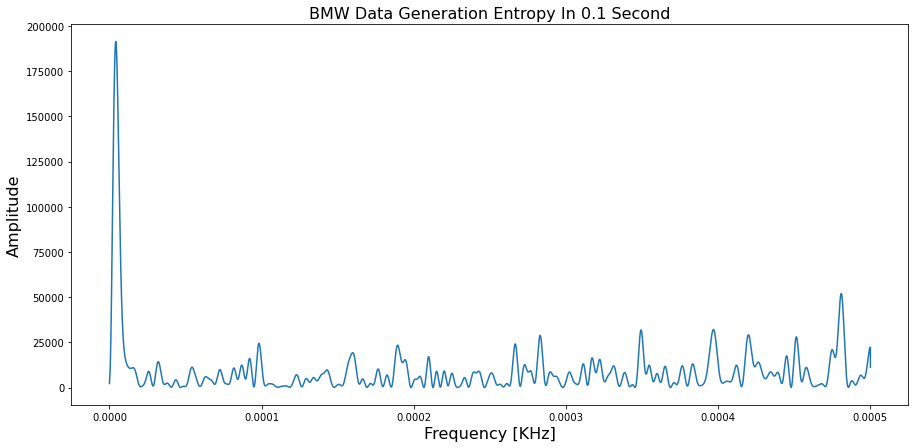

In [140]:
plt.figure(figsize=(15, 7))
plt.plot(np.array(freq0)*1000, amp0)
plt.ylabel('Amplitude', fontsize=16)
plt.xlabel('Frequency [KHz]', fontsize=16)
plt.title("BMW Data Generation Entropy In 0.1 Second", fontsize=16)

Text(0.5, 1.0, 'BMW Time Gap Average In 0.1 Second')

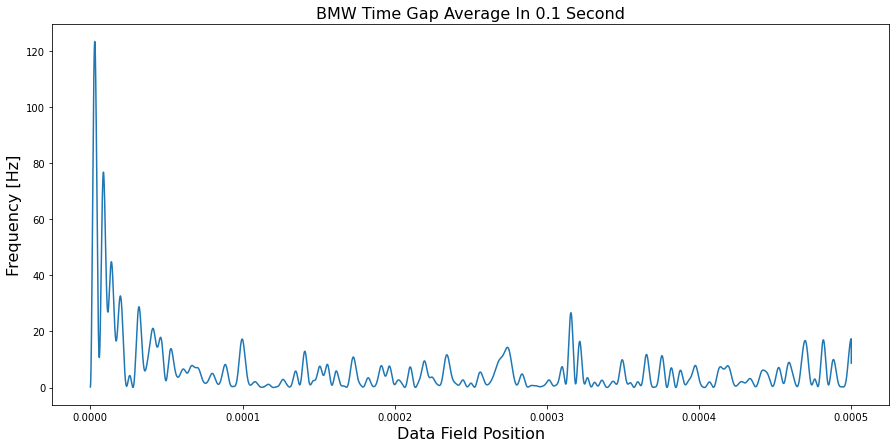

In [113]:
plt.figure(figsize=(15, 7))
plt.plot(freq1, amp1)
plt.ylabel('Frequency [Hz]', fontsize=16)
plt.xlabel('Data Field Position', fontsize=16)
plt.title("BMW Time Gap Average In 0.1 Second", fontsize=16)

array([0.00000000e+00, 1.29701686e-14, 2.59403372e-14, ...,
       4.99974060e-10, 4.99987030e-10, 5.00000000e-10])

In [74]:
Tesla_Normal1 = pd.read_csv("Tesla_Normal1.csv")
Tesla_Normal2 = pd.read_csv("Tesla_Normal2.csv")
print(len(Tesla_Normal1))
print(len(Tesla_Normal2))

Kia_Normal2 = pd.read_csv("Kia_Normal2.csv")
Kia_Normal3 = pd.read_csv("Kia_Normal3.csv")
print(len(Kia_Normal2))
print(len(Kia_Normal2))

BMW_Normal_1K2 = pd.read_csv("BMW_Normal_1K2.csv")
BMW_Normal_2K2 = pd.read_csv("BMW_Normal_2K2.csv")
print(len(BMW_Normal_1K2))
print(len(BMW_Normal_1K2))

59767
65625
57451
57451
63190
63190


In [166]:
Final_Normal_Tesla = pd.concat([pd.DataFrame(Tesla_Normal1[:25000]), pd.DataFrame(Tesla_Normal2[:25000])], 
           ignore_index=True)
print('Tesla: ',len(Final_Normal_Tesla))

Final_Normal_Kia = pd.concat([pd.DataFrame(Kia_Normal2[:25000]), pd.DataFrame(Kia_Normal3[:25000])], 
           ignore_index=True)
print('Kia: ',len(Final_Normal_Kia))

Final_Normal_BMW = pd.concat([pd.DataFrame(BMW_Normal_1K2[:25000]), pd.DataFrame(BMW_Normal_2K2[:25000])], 
           ignore_index=True)
print('BMW: ',len(Final_Normal_BMW))

Tesla:  50000
Kia:  50000
BMW:  50000


In [167]:
#Replay.to_csv ('Replay_Gen.csv', index = False)

In [168]:
DoS_Gen = pd.read_csv("DoS_Gen.csv")
Fuzz_Gen = pd.read_csv("Fuzz_Gen.csv")
Replay_Gen = pd.read_csv("Replay_Gen.csv")

In [169]:
DoS_Gen = np.array(DoS_Gen)
DoS_Gen = DoS_Gen.reshape(-1,1,DoS_Gen.shape[1])
shuffle_idx = np.random.permutation(DoS_Gen.shape[0])
DoS_Gen = DoS_Gen[shuffle_idx]

print('Old:', DoS_Gen.shape)
DoS_Gen = DoS_Gen.reshape(DoS_Gen.shape[0], DoS_Gen.shape[2])
print('Updated:',DoS_Gen.shape)

DoS_Gen = pd.DataFrame(DoS_Gen)
DoS_Gen = DoS_Gen.rename(columns={0:'Result',1:'Avg_time_gap'})

Old: (53568, 1, 2)
Updated: (53568, 2)


In [170]:
Fuzz_Gen = np.array(Fuzz_Gen)
Fuzz_Gen = Fuzz_Gen.reshape(-1,1,Fuzz_Gen.shape[1])
shuffle_idx = np.random.permutation(Fuzz_Gen.shape[0])
Fuzz_Gen = Fuzz_Gen[shuffle_idx]

print('Old:', Fuzz_Gen.shape)
Fuzz_Gen = Fuzz_Gen.reshape(Fuzz_Gen.shape[0], Fuzz_Gen.shape[2])
print('Updated:',Fuzz_Gen.shape)

Fuzz_Gen = pd.DataFrame(Fuzz_Gen)
Fuzz_Gen = Fuzz_Gen.rename(columns={0:'Result',1:'Avg_time_gap'})

Old: (42804, 1, 2)
Updated: (42804, 2)


In [171]:
Replay_Gen = np.array(Replay_Gen)
Replay_Gen = Replay_Gen.reshape(-1,1,Replay_Gen.shape[1])
shuffle_idx = np.random.permutation(Replay_Gen.shape[0])
Replay_Gen = Replay_Gen[shuffle_idx]

print('Old:', Replay_Gen.shape)
Replay_Gen = Replay_Gen.reshape(Replay_Gen.shape[0], Replay_Gen.shape[2])
print('Updated:',Replay_Gen.shape)

Replay_Gen = pd.DataFrame(Replay_Gen)
Replay_Gen = Replay_Gen.rename(columns={0:'Result',1:'Avg_time_gap'})

Old: (73344, 1, 2)
Updated: (73344, 2)


In [173]:
Final_DoS = pd.concat([pd.DataFrame(DoS), pd.DataFrame(DoS_Gen)], ignore_index=True)
Final_DoS = Final_DoS[:50000]
Final_DoS

,Result,Avg_time_gap
0,655.0,0.015878
1,650.0,0.015385
2,598.0,0.016722
3,606.0,0.016502
4,646.0,0.015480
...,...,...
49995,503.0,0.019881
49996,44.0,0.209091
49997,475.0,0.021053
49998,416.0,0.024038


In [174]:
Final_Fuzz = pd.concat([pd.DataFrame(Fuzz), pd.DataFrame(Fuzz_Gen)], ignore_index=True)
Final_Fuzz = Final_Fuzz[:50000]
Final_Fuzz

,Result,Avg_time_gap
0,33.0,0.306061
1,621.0,0.016103
2,673.0,0.014859
3,326.0,0.030675
4,241.0,0.041494
...,...,...
49995,312.0,0.032051
49996,701.0,0.014265
49997,291.0,0.034364
49998,797.0,0.012673


In [175]:
Final_Replay = pd.concat([pd.DataFrame(Replay), pd.DataFrame(Replay_Gen)], ignore_index=True)
Final_Replay = Final_Replay[:50000]
Final_Replay

,Result,Avg_time_gap
0,25.0,0.412000
1,25.0,0.400000
2,28.0,0.317857
3,26.0,0.400000
4,25.0,0.500000
...,...,...
49995,51.0,0.188235
49996,55.0,0.190909
49997,54.0,0.185185
49998,45.0,0.240000


In [176]:
freq0, time0, amp0 = signal.spectrogram(np.array(Final_Normal_Tesla['Result']), fs=0.001, nfft=257*380)
freq1, time1, amp1 = signal.spectrogram(np.array(Final_Normal_Tesla['Avg_time_gap']), fs=0.001, nfft=257*380)
print('Amp Data: ',amp0.shape)
print('Amp Time: ',amp1.shape)

Final_Normal_Spec = pd.concat([pd.DataFrame(amp0), pd.DataFrame(pd.DataFrame(amp1))], 
                              ignore_index=True, axis=1)
listofzeros = [0] * len(Final_Normal_Spec)
Final_Normal_Spec_Tesla = pd.concat([pd.DataFrame(Final_Normal_Spec), pd.DataFrame(pd.DataFrame(listofzeros))], 
                              ignore_index=True, axis=1)
print('Length: ', len(Final_Normal_Spec_Tesla))
Final_Normal_Spec_Tesla

Amp Data:  (48831, 223)
Amp Time:  (48831, 223)
Length:  48831


,0,1,2,3,4,5,6,7,8,9,...,437,438,439,440,441,442,443,444,445,446
0,3.030129e+00,2.054543e+01,2.303623e+01,1.788027e+02,4.146907e+01,2.679845e+01,3.816979e-01,1.602793e-01,4.964010e+01,3.524022e+00,...,0.013330,0.000577,0.000541,0.001503,0.000183,0.008537,0.000404,0.000114,0.005668,0
1,6.066277e+00,4.109377e+01,4.607244e+01,3.575959e+02,8.293577e+01,5.359645e+01,7.650139e-01,3.214242e-01,9.927825e+01,7.047549e+00,...,0.026660,0.001158,0.001084,0.003020,0.000367,0.017077,0.000819,0.000229,0.011337,0
2,6.084334e+00,4.110253e+01,4.607237e+01,3.575678e+02,8.292867e+01,5.359508e+01,7.698680e-01,3.240205e-01,9.927242e+01,7.046066e+00,...,0.026661,0.001170,0.001086,0.003060,0.000368,0.017085,0.000851,0.000232,0.011337,0
3,6.114426e+00,4.111714e+01,4.607225e+01,3.575208e+02,8.291683e+01,5.359280e+01,7.779572e-01,3.283473e-01,9.926269e+01,7.043595e+00,...,0.026663,0.001189,0.001091,0.003127,0.000370,0.017099,0.000905,0.000239,0.011337,0
4,6.156551e+00,4.113758e+01,4.607209e+01,3.574551e+02,8.290027e+01,5.358962e+01,7.892803e-01,3.344042e-01,9.924908e+01,7.040136e+00,...,0.026666,0.001216,0.001098,0.003220,0.000373,0.017118,0.000980,0.000248,0.011338,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48826,2.088045e+06,1.736043e+06,1.702359e+06,1.969240e+06,2.200273e+06,1.945225e+06,1.595022e+06,1.287612e+06,2.754450e+06,4.519641e+06,...,250.849419,406.900240,712.068036,1257.126883,1743.029886,1471.224923,1763.340842,2347.353144,2617.822408,0
48827,2.088309e+06,1.736251e+06,1.702561e+06,1.969493e+06,2.200532e+06,1.945455e+06,1.595226e+06,1.287783e+06,2.754778e+06,4.520179e+06,...,250.881254,406.950619,712.155409,1257.276851,1743.239349,1471.408493,1763.554981,2347.639090,2618.143552,0
48828,2.088497e+06,1.736400e+06,1.702705e+06,1.969674e+06,2.200717e+06,1.945618e+06,1.595371e+06,1.287906e+06,2.755012e+06,4.520563e+06,...,250.903996,406.986608,712.217824,1257.383979,1743.388978,1471.539625,1763.707950,2347.843355,2618.372961,0
48829,2.088610e+06,1.736490e+06,1.702792e+06,1.969783e+06,2.200828e+06,1.945717e+06,1.595459e+06,1.287980e+06,2.755153e+06,4.520794e+06,...,250.917641,407.008202,712.255275,1257.448260,1743.478760,1471.618309,1763.799737,2347.965921,2618.510614,0


Text(0.5, 1.0, 'Tesla Normal Data Generation Entropy In 0.1 Second')

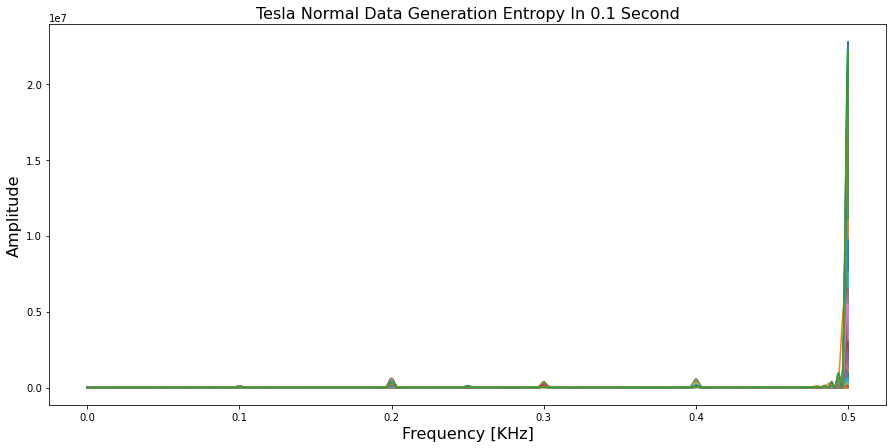

In [177]:
plt.figure(figsize=(15, 7))
plt.plot(np.array(freq0)*1000, amp0)
plt.ylabel('Amplitude', fontsize=16)
plt.xlabel('Frequency [KHz]', fontsize=16)
plt.title("Tesla Normal Data Generation Entropy In 0.1 Second", fontsize=16)

Text(0.5, 1.0, 'Tesla Normal Data Time Gap Average In 0.1 Second')

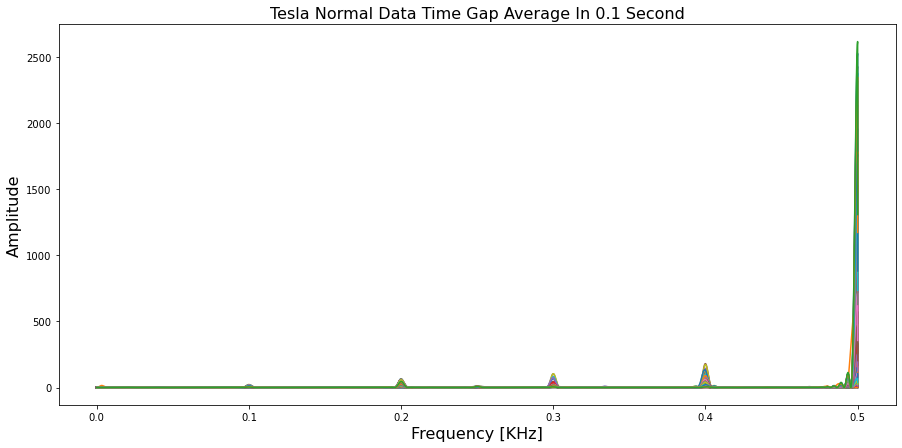

In [178]:
plt.figure(figsize=(15, 7))
plt.plot(np.array(freq1)*1000, amp1)
plt.ylabel('Amplitude', fontsize=16)
plt.xlabel('Frequency [KHz]', fontsize=16)
plt.title("Tesla Normal Data Time Gap Average In 0.1 Second", fontsize=16)

In [179]:
freq0, time0, amp0 = signal.spectrogram(np.array(Final_Normal_Kia['Result']), fs=0.001, nfft=257*380)
freq1, time1, amp1 = signal.spectrogram(np.array(Final_Normal_Kia['Avg_time_gap']), fs=0.001, nfft=257*380)
print('Amp Data: ',amp0.shape)
print('Amp Time: ',amp1.shape)

Final_Normal_Spec = pd.concat([pd.DataFrame(amp0), pd.DataFrame(pd.DataFrame(amp1))], 
                              ignore_index=True, axis=1)
listofzeros = [0] * len(Final_Normal_Spec)
Final_Normal_Spec_Kia = pd.concat([pd.DataFrame(Final_Normal_Spec), pd.DataFrame(pd.DataFrame(listofzeros))], 
                              ignore_index=True, axis=1)
print('Length: ', len(Final_Normal_Spec_Kia))
Final_Normal_Spec_Kia

Amp Data:  (48831, 223)
Amp Time:  (48831, 223)
Length:  48831


,0,1,2,3,4,5,6,7,8,9,...,437,438,439,440,441,442,443,444,445,446
0,4.491789e+01,4.289919e+00,0.076670,9.087459,0.478426,4.700722,0.360310,2.303584,20.888240,3.260442,...,0.029076,0.005989,0.008297,0.004961,0.029227,0.003859,0.001692,0.015178,0.033527,0
1,8.983425e+01,8.580790e+00,0.153421,18.174823,0.956838,9.401281,0.720561,4.606976,41.775503,6.520582,...,0.058151,0.011982,0.016600,0.009937,0.058453,0.007717,0.003393,0.030391,0.067061,0
2,8.982963e+01,8.583644e+00,0.153664,18.174535,0.956792,9.400791,0.720388,4.606398,41.772573,6.519677,...,0.058147,0.011993,0.016616,0.009980,0.058451,0.007717,0.003420,0.030491,0.067080,0
3,8.982193e+01,8.588402e+00,0.154068,18.174055,0.956716,9.399974,0.720099,4.605434,41.767691,6.518167,...,0.058141,0.012011,0.016642,0.010051,0.058448,0.007716,0.003464,0.030660,0.067112,0
4,8.981115e+01,8.595061e+00,0.154634,18.173384,0.956609,9.398831,0.719694,4.604085,41.760857,6.516055,...,0.058133,0.012037,0.016679,0.010150,0.058443,0.007715,0.003525,0.030895,0.067157,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48826,1.146412e+06,1.133595e+06,936861.910543,470651.256497,401793.608685,354963.800477,331182.814688,261420.308679,324613.755173,365942.215226,...,389.337416,553.193800,910.706351,952.438417,345.242176,152.544061,132.236608,738.951311,909.446099,0
48827,1.146550e+06,1.133730e+06,936975.868605,470710.434743,401839.199827,355006.734691,331221.423760,261453.109473,324653.027635,365988.923722,...,389.385962,553.260245,910.818769,952.547916,345.281475,152.565287,132.252054,739.029571,909.559929,0
48828,1.146649e+06,1.133826e+06,937057.274028,470752.708544,401871.767539,355037.404551,331249.003894,261476.540633,324681.081749,366022.289846,...,389.420641,553.307709,910.899073,952.626136,345.309548,152.580449,132.263087,739.085475,909.641242,0
48829,1.146708e+06,1.133884e+06,937106.120005,470778.074274,401891.309211,355055.807492,331265.552865,261490.600137,324697.915160,366042.310686,...,389.441450,553.336189,910.947259,952.673070,345.326392,152.589548,132.269707,739.119019,909.690034,0


Text(0.5, 1.0, 'Kia Normal Data Generation Entropy In 0.1 Second')

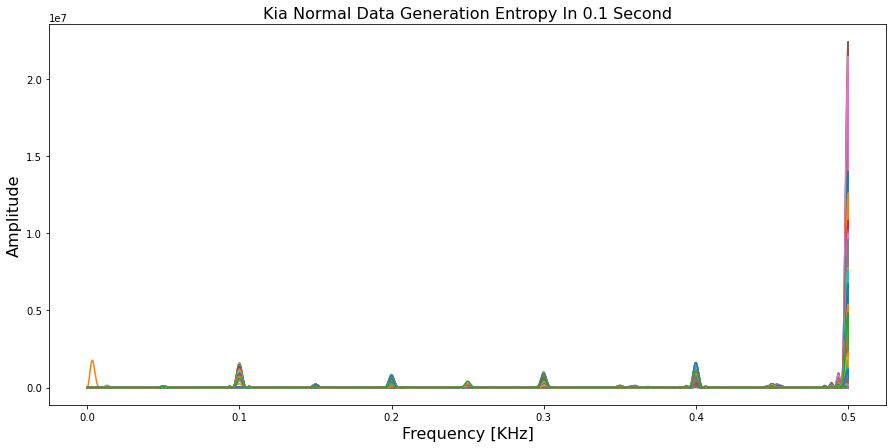

In [180]:
plt.figure(figsize=(15, 7))
plt.plot(np.array(freq0)*1000, amp0)
plt.ylabel('Amplitude', fontsize=16)
plt.xlabel('Frequency [KHz]', fontsize=16)
plt.title("Kia Normal Data Generation Entropy In 0.1 Second", fontsize=16)

Text(0.5, 1.0, 'Kia Normal Data Time Gap Average In 0.1 Second')

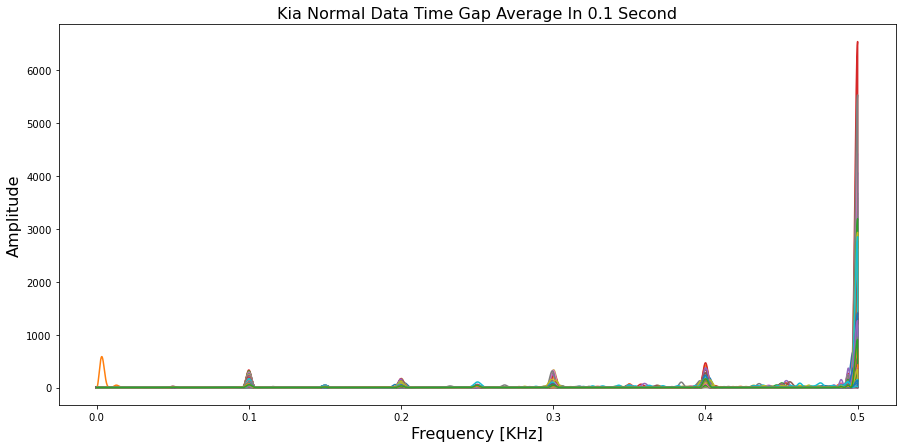

In [181]:
plt.figure(figsize=(15, 7))
plt.plot(np.array(freq1)*1000, amp1)
plt.ylabel('Amplitude', fontsize=16)
plt.xlabel('Frequency [KHz]', fontsize=16)
plt.title("Kia Normal Data Time Gap Average In 0.1 Second", fontsize=16)

In [182]:
freq0, time0, amp0 = signal.spectrogram(np.array(Final_Normal_BMW['Result']), fs=0.001, nfft=257*380)
freq1, time1, amp1 = signal.spectrogram(np.array(Final_Normal_BMW['Avg_time_gap']), fs=0.001, nfft=257*380)
print('Amp Data: ',amp0.shape)
print('Amp Time: ',amp1.shape)

Final_Normal_Spec = pd.concat([pd.DataFrame(amp0), pd.DataFrame(pd.DataFrame(amp1))], 
                              ignore_index=True, axis=1)
listofzeros = [0] * len(Final_Normal_Spec)
Final_Normal_Spec_BMW = pd.concat([pd.DataFrame(Final_Normal_Spec), pd.DataFrame(pd.DataFrame(listofzeros))], 
                              ignore_index=True, axis=1)
print('Length: ', len(Final_Normal_Spec_BMW))
Final_Normal_Spec_BMW

Amp Data:  (48831, 223)
Amp Time:  (48831, 223)
Length:  48831


,0,1,2,3,4,5,6,7,8,9,...,437,438,439,440,441,442,443,444,445,446
0,0.674695,32.972899,235.502706,19.622096,2.829417,4.312866e+01,6.957098e+01,1.757201e+00,1.445127e+01,0.971030,...,0.022405,11.839211,7.058538,1.543040,1.434450,4.617025,16.400171,101.539829,36.955600,0
1,1.369190,65.952253,470.988818,39.273862,5.655495,8.628837e+01,1.391509e+02,3.516173e+00,2.891389e+01,2.027480,...,0.044749,23.678451,14.117652,3.086267,2.869458,9.234825,32.988585,203.103794,73.944620,0
2,1.428590,65.971618,470.939038,39.362865,5.645485,8.638156e+01,1.391777e+02,3.521486e+00,2.894792e+01,2.283728,...,0.044569,23.678539,14.119380,3.086828,2.871134,9.237149,33.553287,203.176206,74.044875,0
3,1.527591,66.003899,470.856080,39.511197,5.628823,8.653685e+01,1.392224e+02,3.530346e+00,2.900463e+01,2.710778,...,0.044269,23.678685,14.122260,3.087765,2.873927,9.241023,34.494384,203.296895,74.211961,0
4,1.666194,66.049101,470.739958,39.718845,5.605538,8.675425e+01,1.392850e+02,3.542758e+00,2.908403e+01,3.308581,...,0.043852,23.678889,14.126292,3.089075,2.877835,9.246445,35.811765,203.465869,74.445868,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48826,274146.859564,448842.317272,1462.813531,101555.438376,939229.236221,5.727979e+06,4.086228e+06,2.475955e+06,2.339507e+06,207751.754101,...,32085.929871,6953.798380,1407.864223,39685.644450,20900.136279,15147.794901,6833.582690,455724.772395,238988.707438,0
48827,274149.452725,448897.670375,1460.182485,101567.028797,939305.365460,5.728705e+06,4.086696e+06,2.476267e+06,2.339734e+06,207764.426190,...,32090.051615,6954.522222,1406.971233,39690.373718,20902.723163,15149.557427,6831.380733,455774.726424,239019.778063,0
48828,274151.304019,448937.211609,1458.302939,101575.308338,939359.747967,5.729224e+06,4.087030e+06,2.476490e+06,2.339895e+06,207773.478055,...,32092.995978,6955.039289,1406.333302,39693.752047,20904.571098,15150.816479,6829.807711,455810.410607,239041.973330,0
48829,274152.414411,448960.937670,1457.175121,101580.276329,939392.379263,5.729535e+06,4.087230e+06,2.476624e+06,2.339992e+06,207778.909325,...,32094.762699,6955.349545,1405.950511,39695.779157,20905.679923,15151.571952,6828.863819,455831.822210,239055.291276,0


Text(0.5, 1.0, 'BMW Normal Data Generation Entropy In 0.1 Second')

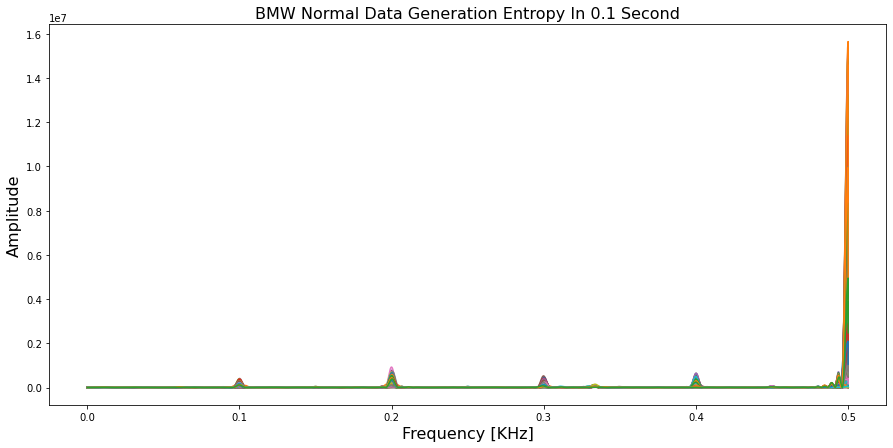

In [183]:
plt.figure(figsize=(15, 7))
plt.plot(np.array(freq0)*1000, amp0)
plt.ylabel('Amplitude', fontsize=16)
plt.xlabel('Frequency [KHz]', fontsize=16)
plt.title("BMW Normal Data Generation Entropy In 0.1 Second", fontsize=16)

Text(0.5, 1.0, 'BMW Normal Data Time Gap Average In 0.1 Second')

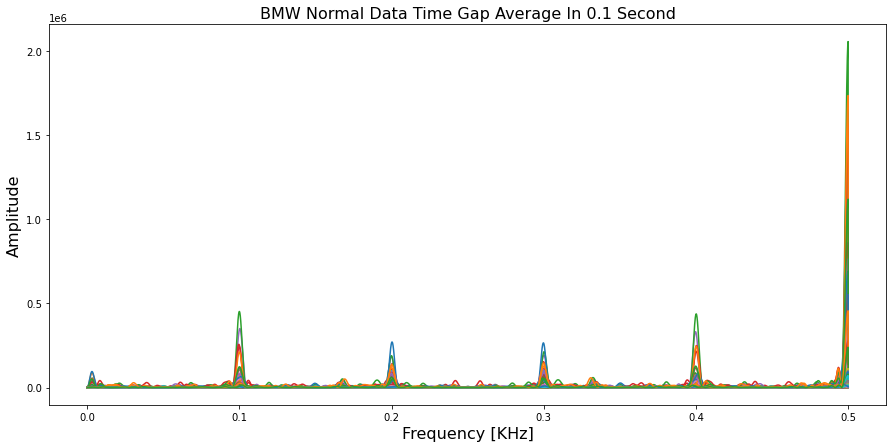

In [184]:
plt.figure(figsize=(15, 7))
plt.plot(np.array(freq1)*1000, amp1)
plt.ylabel('Amplitude', fontsize=16)
plt.xlabel('Frequency [KHz]', fontsize=16)
plt.title("BMW Normal Data Time Gap Average In 0.1 Second", fontsize=16)

In [185]:
freq0, time0, amp0 = signal.spectrogram(np.array(Final_DoS['Result']), fs=0.001, nfft=257*380)
freq1, time1, amp1 = signal.spectrogram(np.array(Final_DoS['Avg_time_gap']), fs=0.001, nfft=257*380)
print('Amp Data: ',amp0.shape)
print('Amp Time: ',amp1.shape)

Final_Normal_Spec = pd.concat([pd.DataFrame(amp0), pd.DataFrame(pd.DataFrame(amp1))], 
                              ignore_index=True, axis=1)
listofzeros = [1] * len(Final_Normal_Spec)
Final_DoS_Spec = pd.concat([pd.DataFrame(Final_Normal_Spec), pd.DataFrame(pd.DataFrame(listofzeros))], 
                              ignore_index=True, axis=1)
print('Length: ', len(Final_DoS_Spec))
Final_DoS_Spec

Amp Data:  (48831, 223)
Amp Time:  (48831, 223)
Length:  48831


,0,1,2,3,4,5,6,7,8,9,...,437,438,439,440,441,442,443,444,445,446
0,2.703293e+06,5.850940e+06,4.710277e+04,6.607923e+05,5.474211e+03,150843.375220,6.413093e+06,189753.175692,1.616462e+06,2.906743e+06,...,0.004692,0.057042,0.046118,0.002081,0.000171,0.125622,0.026367,0.005468,0.066685,1
1,5.406711e+06,1.170491e+07,9.424723e+04,1.322159e+06,1.098870e+04,301704.848525,1.282731e+07,382256.058157,3.237835e+06,5.814219e+06,...,0.009393,0.114091,0.092237,0.004172,0.000362,0.251247,0.052731,0.010939,0.133396,1
2,5.407086e+06,1.171401e+07,9.437227e+04,1.323883e+06,1.110953e+04,301759.140121,1.283067e+07,390504.737982,3.252571e+06,5.816415e+06,...,0.009417,0.114112,0.092241,0.004199,0.000422,0.251252,0.052719,0.010951,0.133471,1
3,5.407710e+06,1.172917e+07,9.458065e+04,1.326755e+06,1.131091e+04,301849.617249,1.283627e+07,404251.069450,3.277130e+06,5.820075e+06,...,0.009457,0.114146,0.092247,0.004244,0.000523,0.251262,0.052699,0.010971,0.133596,1
4,5.408585e+06,1.175040e+07,9.487237e+04,1.330776e+06,1.159281e+04,301976.266611,1.284411e+07,423492.850468,3.311508e+06,5.825198e+06,...,0.009513,0.114194,0.092255,0.004307,0.000665,0.251275,0.052671,0.010998,0.133771,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48826,2.880184e+07,3.171076e+05,1.632398e+06,1.226136e+06,1.773238e+06,67553.691143,1.664934e+07,3753.697752,1.291007e+06,9.008528e+06,...,2.489101,0.392601,0.189457,1.689412,0.620408,1.027449,0.971022,0.120079,0.354687,1
48827,2.880430e+07,3.158538e+05,1.631288e+06,1.224816e+06,1.772956e+06,67673.521994,1.664831e+07,2424.482534,1.289985e+06,9.009281e+06,...,2.489040,0.391984,0.189311,1.689764,0.620368,1.027450,0.970976,0.120088,0.354731,1
48828,2.880606e+07,3.149581e+05,1.630495e+06,1.223873e+06,1.772755e+06,67759.193485,1.664757e+07,1474.979848,1.289255e+06,9.009819e+06,...,2.488997,0.391544,0.189208,1.690016,0.620339,1.027451,0.970943,0.120094,0.354762,1
48829,2.880711e+07,3.144207e+05,1.630019e+06,1.223307e+06,1.772634e+06,67810.627594,1.664712e+07,905.252939,1.288817e+06,9.010141e+06,...,2.488971,0.391279,0.189145,1.690167,0.620322,1.027451,0.970923,0.120098,0.354781,1


Text(0.5, 1.0, 'DoS Data Generation Entropy In 0.1 Second')

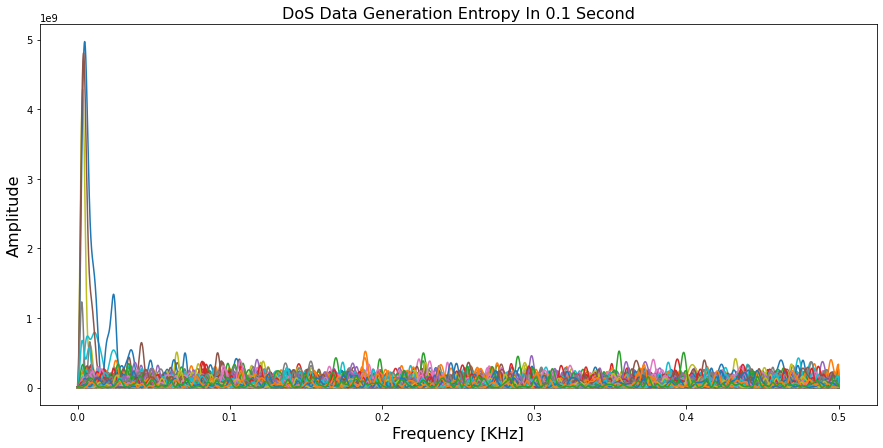

In [186]:
plt.figure(figsize=(15, 7))
plt.plot(np.array(freq0)*1000, amp0)
plt.ylabel('Amplitude', fontsize=16)
plt.xlabel('Frequency [KHz]', fontsize=16)
plt.title("DoS Data Generation Entropy In 0.1 Second", fontsize=16)

Text(0.5, 1.0, 'DoS Data Time Gap Average In 0.1 Second')

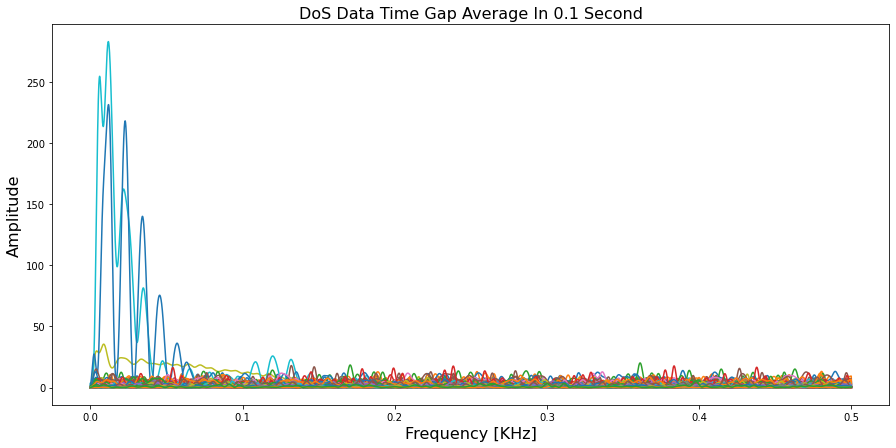

In [187]:
plt.figure(figsize=(15, 7))
plt.plot(np.array(freq1)*1000, amp1)
plt.ylabel('Amplitude', fontsize=16)
plt.xlabel('Frequency [KHz]', fontsize=16)
plt.title("DoS Data Time Gap Average In 0.1 Second", fontsize=16)

In [188]:
freq0, time0, amp0 = signal.spectrogram(np.array(Final_Fuzz['Result']), fs=0.001, nfft=257*380)
freq1, time1, amp1 = signal.spectrogram(np.array(Final_Fuzz['Avg_time_gap']), fs=0.001, nfft=257*380)
print('Amp Data: ',amp0.shape)
print('Amp Time: ',amp1.shape)

Final_Normal_Spec = pd.concat([pd.DataFrame(amp0), pd.DataFrame(pd.DataFrame(amp1))], 
                              ignore_index=True, axis=1)
listofzeros = [2] * len(Final_Normal_Spec)
Final_Fuzz_Spec = pd.concat([pd.DataFrame(Final_Normal_Spec), pd.DataFrame(pd.DataFrame(listofzeros))], 
                              ignore_index=True, axis=1)
print('Length: ', len(Final_Fuzz_Spec))
Final_Fuzz_Spec

Amp Data:  (48831, 223)
Amp Time:  (48831, 223)
Length:  48831


,0,1,2,3,4,5,6,7,8,9,...,437,438,439,440,441,442,443,444,445,446
0,1.128229e+07,9.605179e+06,9.870871e+05,3.136711e+06,1.418509e+06,1.130008e+07,5.057533e+05,2.529141e+07,1.333626e+06,8.246753e+06,...,0.003474,0.011974,0.645811,0.346288,0.104699,0.063137,0.632777,0.069054,0.319028,2
1,2.256513e+07,1.922164e+07,1.992336e+06,6.273723e+06,2.837958e+06,2.260154e+07,1.012044e+06,5.058458e+07,2.667789e+06,1.650540e+07,...,0.006994,0.024030,1.291921,0.692568,0.209500,0.126383,1.265582,0.138556,0.638505,2
2,2.256680e+07,1.925550e+07,2.046821e+06,6.274628e+06,2.840777e+06,2.260568e+07,1.013657e+06,5.058986e+07,2.669396e+06,1.654109e+07,...,0.007131,0.024273,1.292818,0.692546,0.209806,0.126710,1.265667,0.139901,0.639850,2
3,2.256958e+07,1.931192e+07,2.137621e+06,6.276137e+06,2.845477e+06,2.261258e+07,1.016345e+06,5.059867e+07,2.672075e+06,1.660057e+07,...,0.007358,0.024679,1.294313,0.692510,0.210315,0.127255,1.265810,0.142142,0.642091,2
4,2.257348e+07,1.939090e+07,2.264728e+06,6.278248e+06,2.852060e+06,2.262225e+07,1.020107e+06,5.061100e+07,2.675825e+06,1.668383e+07,...,0.007678,0.025247,1.296406,0.692460,0.211028,0.128018,1.266010,0.145279,0.645229,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48826,1.778400e+06,3.998097e+05,1.390531e+07,5.380940e+06,3.242489e+06,1.378134e+06,5.174255e+04,2.646445e+06,4.500753e+07,2.783570e+06,...,47.622481,2.898522,3.761857,20.664641,0.153170,3.457100,8.299403,1.385862,1.394817,2
48827,1.778272e+06,3.993656e+05,1.390535e+07,5.382232e+06,3.241726e+06,1.376918e+06,5.032736e+04,2.647073e+06,4.501155e+07,2.782051e+06,...,47.627829,2.897662,3.762405,20.657714,0.153151,3.456181,8.299090,1.385841,1.394632,2
48828,1.778181e+06,3.990484e+05,1.390539e+07,5.383155e+06,3.241180e+06,1.376048e+06,4.931652e+04,2.647521e+06,4.501443e+07,2.780966e+06,...,47.631649,2.897048,3.762796,20.652765,0.153138,3.455524,8.298867,1.385826,1.394500,2
48829,1.778126e+06,3.988580e+05,1.390541e+07,5.383709e+06,3.240852e+06,1.375527e+06,4.871003e+04,2.647790e+06,4.501615e+07,2.780315e+06,...,47.633942,2.896679,3.763031,20.649795,0.153130,3.455130,8.298733,1.385818,1.394421,2


Text(0.5, 1.0, 'Fuzz Data Generation Entropy In 0.1 Second')

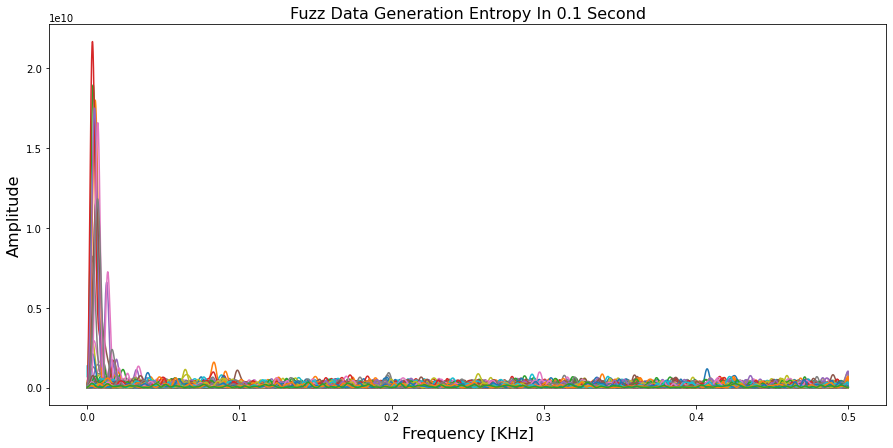

In [189]:
plt.figure(figsize=(15, 7))
plt.plot(np.array(freq0)*1000, amp0)
plt.ylabel('Amplitude', fontsize=16)
plt.xlabel('Frequency [KHz]', fontsize=16)
plt.title("Fuzz Data Generation Entropy In 0.1 Second", fontsize=16)

Text(0.5, 1.0, 'Fuzz Data Time Gap Average In 0.1 Second')

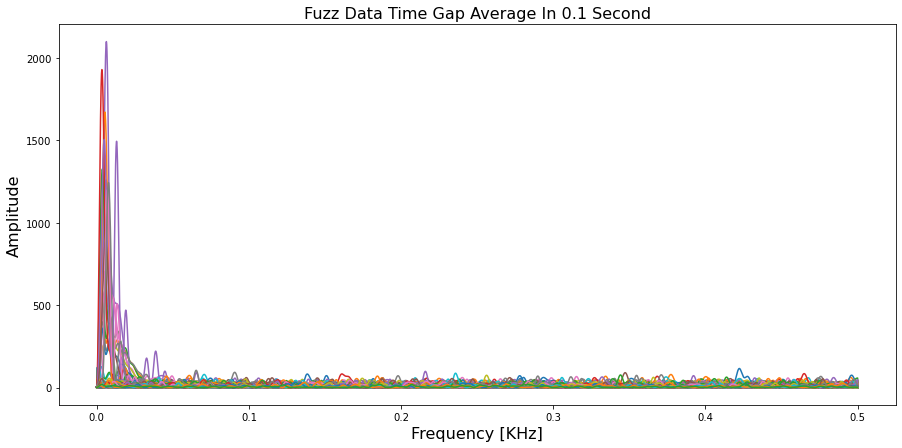

In [190]:
plt.figure(figsize=(15, 7))
plt.plot(np.array(freq1)*1000, amp1)
plt.ylabel('Amplitude', fontsize=16)
plt.xlabel('Frequency [KHz]', fontsize=16)
plt.title("Fuzz Data Time Gap Average In 0.1 Second", fontsize=16)

In [191]:
freq0, time0, amp0 = signal.spectrogram(np.array(Final_Replay['Result']), fs=0.001, nfft=257*380)
freq1, time1, amp1 = signal.spectrogram(np.array(Final_Replay['Avg_time_gap']), fs=0.001, nfft=257*380)
print('Amp Data: ',amp0.shape)
print('Amp Time: ',amp1.shape)

Final_Normal_Spec = pd.concat([pd.DataFrame(amp0), pd.DataFrame(pd.DataFrame(amp1))], 
                              ignore_index=True, axis=1)
listofzeros = [3] * len(Final_Normal_Spec)
Final_Replay_Spec = pd.concat([pd.DataFrame(Final_Normal_Spec), pd.DataFrame(pd.DataFrame(listofzeros))], 
                              ignore_index=True, axis=1)
print('Length: ', len(Final_Replay_Spec))
Final_Replay_Spec

Amp Data:  (48831, 223)
Amp Time:  (48831, 223)
Length:  48831


,0,1,2,3,4,5,6,7,8,9,...,437,438,439,440,441,442,443,444,445,446
0,2233.977494,49209.004821,51030.081755,2222.637383,403.050782,63556.519180,2809.697064,8.175387e+03,14503.195431,110084.071912,...,3.350887,1.113620,1.667940,0.782644,0.608095,1.916117,0.006038,2.905754,0.315757,3
1,4470.989130,98863.871319,102148.928304,4447.522627,807.243199,127130.978593,5621.432501,1.635179e+04,29005.992518,220166.447509,...,6.703498,2.227317,3.338263,1.565494,1.216194,3.832370,0.012109,5.812007,0.631466,3
2,4480.091350,100201.406126,102415.210500,4454.265859,810.667859,127184.795676,5627.547513,1.635484e+04,29004.797505,220161.358843,...,6.708667,2.227549,3.345409,1.566114,1.216205,3.832777,0.012209,5.813503,0.631322,3
3,4495.261014,102430.463394,102858.973546,4465.503394,816.374791,127274.478757,5637.738848,1.635992e+04,29002.805873,220152.878646,...,6.717281,2.227934,3.357318,1.567146,1.216223,3.833457,0.012376,5.815995,0.631081,3
4,4516.497073,105550.792033,103480.156521,4481.233458,824.362749,127400.009755,5652.005978,1.636704e+04,29000.017703,220141.008290,...,6.729341,2.228474,3.373990,1.568592,1.216249,3.834408,0.012610,5.819484,0.630745,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48826,22272.678386,479.819136,117101.120449,9373.187110,13519.081960,757746.503126,772484.362083,2.314826e+06,12117.983031,177876.702056,...,0.018039,20.868410,0.059440,3.069650,5.119851,16.291050,14.897286,1.396577,0.048758,3
48827,22274.844955,479.391259,117112.924869,9363.184579,13526.382537,757844.730665,772494.916445,2.314982e+06,12049.644024,177847.650098,...,0.017311,20.871800,0.059319,3.061451,5.111683,16.292333,14.900748,1.397763,0.048864,3
48828,22276.392633,479.085742,117121.357110,9356.041494,13531.599077,757914.901149,772502.452351,2.315094e+06,12000.827093,177826.893654,...,0.016791,20.874221,0.059233,3.055594,5.105848,16.293249,14.903221,1.398610,0.048941,3
48829,22277.321292,478.902475,117126.416659,9351.756275,13534.729739,757957.006622,772506.972724,2.315161e+06,11971.535592,177814.437770,...,0.016479,20.875674,0.059181,3.052079,5.102347,16.293799,14.904705,1.399118,0.048986,3


Text(0.5, 1.0, 'Replay Data Generation Entropy In 0.1 Second')

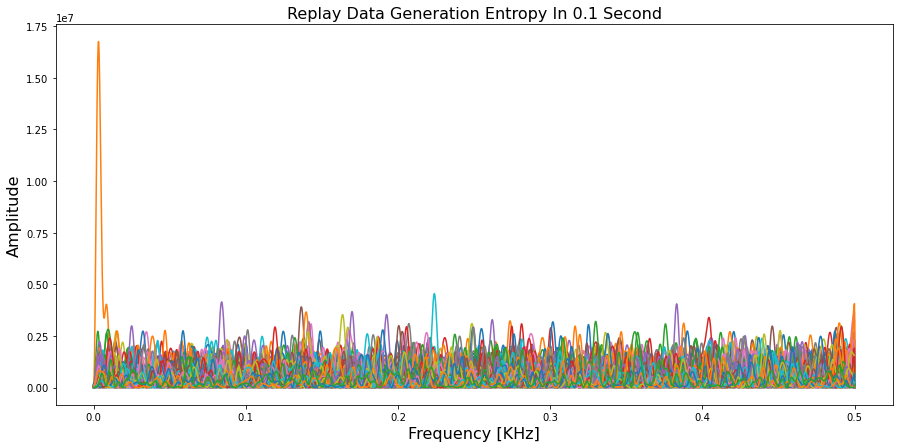

In [192]:
plt.figure(figsize=(15, 7))
plt.plot(np.array(freq0)*1000, amp0)
plt.ylabel('Amplitude', fontsize=16)
plt.xlabel('Frequency [KHz]', fontsize=16)
plt.title("Replay Data Generation Entropy In 0.1 Second", fontsize=16)

Text(0.5, 1.0, 'Replay Data Time Gap Average In 0.1 Second')

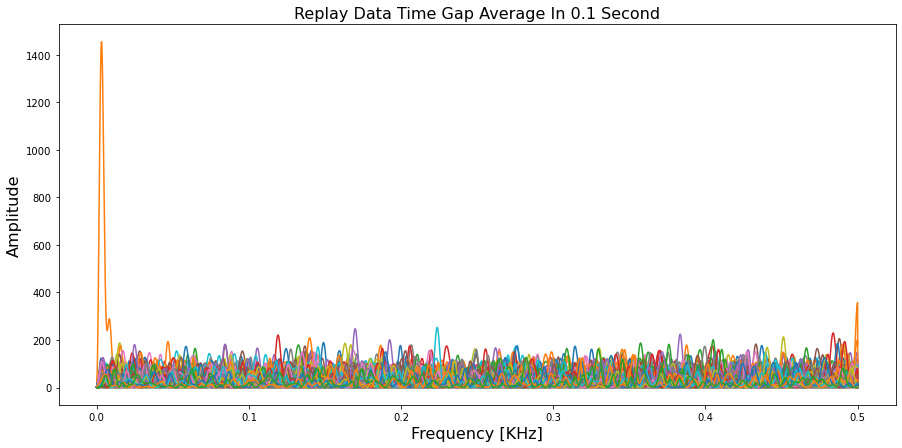

In [193]:
plt.figure(figsize=(15, 7))
plt.plot(np.array(freq1)*1000, amp1)
plt.ylabel('Amplitude', fontsize=16)
plt.xlabel('Frequency [KHz]', fontsize=16)
plt.title("Replay Data Time Gap Average In 0.1 Second", fontsize=16)

In [194]:
concatnated = pd.concat([Final_Normal_Spec_Tesla, Final_Normal_Spec_Kia, Final_Normal_Spec_BMW,
                        Final_DoS_Spec, Final_Fuzz_Spec, Final_Replay_Spec], 
                              ignore_index=True)

In [195]:
#concatnated.to_csv ('Concatnated.csv', index = False)